In [ ]:
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

FileName = 'WIPRO.NS.csv'
Wipro=pd.read_csv(FileName)

In [ ]:
Wipro.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/01/1996,1.1250,1.1250,1.1250,1.1250,0.921463,19999
1,02/01/1996,1.0375,1.0375,1.0375,1.0375,0.849793,39999
2,03/01/1996,1.0750,1.0750,1.0750,1.0750,0.880509,19999
3,04/01/1996,1.0750,1.0750,1.0750,1.0750,0.880509,119999
4,05/01/1996,1.0750,1.0750,1.0750,1.0750,0.880509,0


In [ ]:
Wipro.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6447,23/08/2021,626.000000,636.950012,623.500000,628.849976,628.849976,7036375
6448,24/08/2021,636.000000,636.000000,624.099976,633.549988,633.549988,4483718
6449,25/08/2021,635.000000,642.799988,629.549988,631.650024,631.650024,6407718
6450,26/08/2021,632.200012,638.500000,626.000000,628.950012,628.950012,4208351
6451,27/08/2021,629.500000,636.000000,625.299988,634.950012,634.950012,4371554


In [ ]:
df1=Wipro.reset_index()['Close']

In [ ]:
df1.shape

(6452,)

In [ ]:
df1

0         1.125000
1         1.037500
2         1.075000
3         1.075000
4         1.075000
           ...    
6447    628.849976
6448    633.549988
6449    631.650024
6450    628.950012
6451    634.950012
Name: Close, Length: 6452, dtype: float64

Text(0.5, 1.0, 'Wipro Share Price 2002-2021')

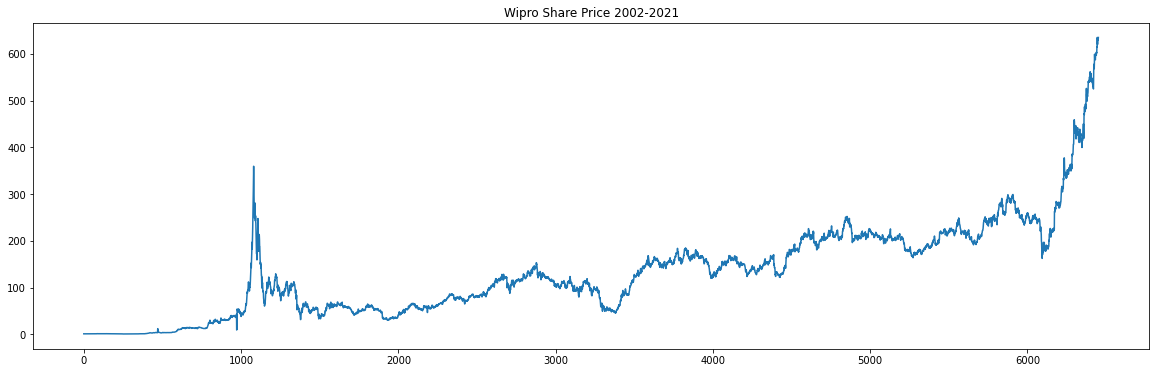

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(df1)
plt.title('Wipro Share Price 2002-2021')

In [ ]:
Wipro.Date = pd.to_datetime(Wipro.Date)
Wipro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6452 entries, 0 to 6451
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6452 non-null   datetime64[ns]
 1   Open       6452 non-null   float64       
 2   High       6452 non-null   float64       
 3   Low        6452 non-null   float64       
 4   Close      6452 non-null   float64       
 5   Adj Close  6452 non-null   float64       
 6   Volume     6452 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 353.0 KB


In [ ]:
Wipro = Wipro.set_index('Date')

In [ ]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     / 306 kB 701 kB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8435 sha256=4795661e359fe31659f961ca60980a54dc6140f1cc2cea978bf4c41b8e69ca8f
  Stored in directory: /tmp/pip-ephem-wheel-cache-wnmhqhzf/wheels/eb/17/99/0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance


In [ ]:
pip install --upgrade mplfinance

     |████████████████████████████████| 62 kB 942 kB/s 


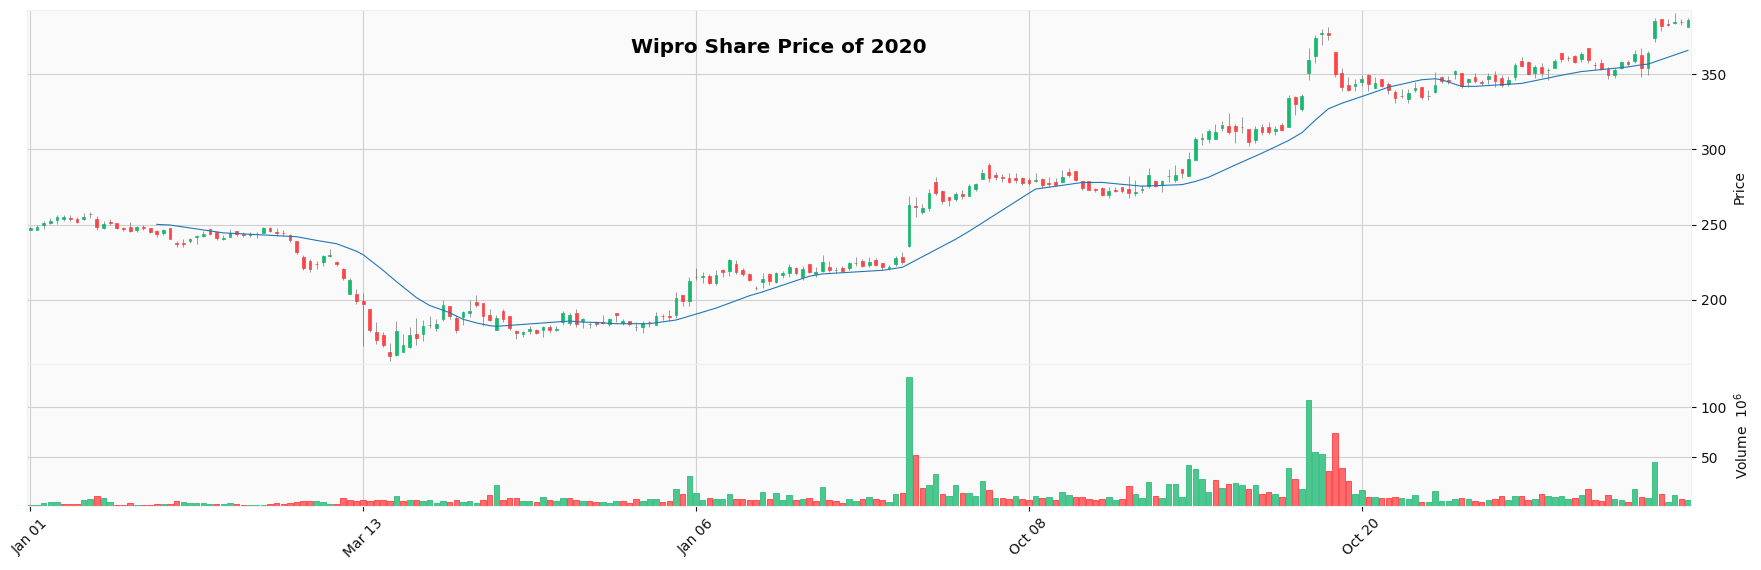

In [ ]:
import mplfinance as mpf
mpf.plot(Wipro['2020'], 
         type='candle', mav=(20), 
         volume=True, 
         title = 'Wipro Share Price of 2020', 
         figratio=(20,6), tight_layout = True, 
         style = 'yahoo')

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[5.63717847e-04],
       [4.25744947e-04],
       [4.84876190e-04],
       ...,
       [9.94796470e-01],
       [9.90539001e-01],
       [1.00000000e+00]])

In [ ]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size, test_size

(4839, 1613)

In [ ]:
len(train_data), len(test_data)

(4839, 1613)

In [ ]:
import numpy 
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range (len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train)

[[0.00056372 0.00042574 0.00048488 ... 0.00075294 0.00085937 0.00083966]
 [0.00042574 0.00048488 0.00048488 ... 0.00085937 0.00083966 0.00083966]
 [0.00048488 0.00048488 0.00048488 ... 0.00083966 0.00083966 0.00083375]
 ...
 [0.34006583 0.34287457 0.34926075 ... 0.35745041 0.36841926 0.36632012]
 [0.34287457 0.34926075 0.34648158 ... 0.36841926 0.36632012 0.36493053]
 [0.34926075 0.34648158 0.34272674 ... 0.36632012 0.36493053 0.37619503]]


In [ ]:
print(X_train.shape), print(y_train.shape)

(4738, 100)
(4738,)


(None, None)

In [ ]:
print(X_test.shape), print(y_test.shape)

(1512, 100)
(1512,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
75/75 [==============================] - 21s 211ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 2/100
75/75 [==============================] - 14s 192ms/step - loss: 2.9779e-04 - val_loss: 0.0018
Epoch 3/100
75/75 [==============================] - 15s 195ms/step - loss: 2.4133e-04 - val_loss: 0.0014
Epoch 4/100
75/75 [==============================] - 15s 195ms/step - loss: 2.0061e-04 - val_loss: 0.0011
Epoch 5/100
75/75 [==============================] - 15s 194ms/step - loss: 1.7961e-04 - val_loss: 0.0020
Epoch 6/100
75/75 [==============================] - 15s 195ms/step - loss: 1.6147e-04 - val_loss: 0.0019
Epoch 7/100
75/75 [==============================] - 15s 194ms/step - loss: 1.4622e-04 - val_loss: 0.0012
Epoch 8/100
75/75 [==============================] - 15s 195ms/step - loss: 1.5554e-04 - val_loss: 0.0013
Epoch 9/100
75/75 [==============================] - 14s 193ms/step - loss: 1.2480e-04 - val_loss: 8.8274e-04
Epoch 10/100
75/75 [==========================

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

109.0233041201508

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

262.48558026750237

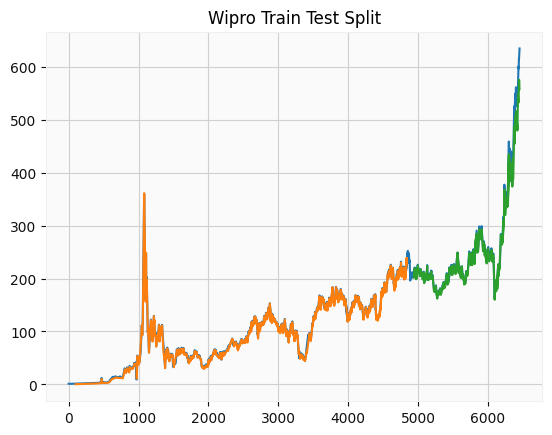

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Wipro Train Test Split')
plt.show()

In [ ]:
len(test_data)

1613

In [ ]:
x_input=test_data[1513:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8919939]
101
1 day input [0.67233405 0.68944269 0.69590772 0.70852239 0.68092781 0.65940404
 0.67793183 0.73863991 0.74423765 0.74005905 0.76615562 0.74888932
 0.75614272 0.76363267 0.77033422 0.7712015  0.77577431 0.76725942
 0.75874453 0.77238413 0.80660138 0.81125305 0.82812519 0.81622012
 0.79919029 0.78476228 0.78689096 0.79989984 0.80557645 0.80021522
 0.80723215 0.8107012  0.81487975 0.83017505 0.85169886 0.84822981
 0.84878166 0.85469479 0.85501017 0.84878166 0.85217189 0.86328855
 0.86699407 0.85690239 0.87274955 0.87282837 0.88433923 0.87850503
 0.87432638 0.87976647 0.86573262 0.8536699  0.87637624 0.85051624
 0.86455    0.86210592 0.86194828 0.8543794  0.85918882 0.8492547
 0.84807207 0.8445242  0.83861107 0.83790157 0.83608818 0.82788863
 0.82796745 0.82639061 0.88449697 0.90688802 0.90980513 0.90357662
 0.89458865 0.91997572 0.94354939 0.92983093 0.93140776 0.93219618
 0.92983093 0.92462739 0.93266921 0.9439436  0.93984378 0.94630885
 0.941736   0.93984378 0.95096043 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

6452

Text(0.5, 1.0, 'Wipro Prediction of Next 30 Days')

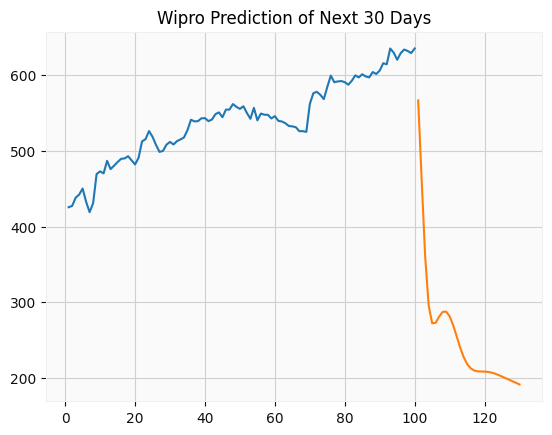

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[6352:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('Wipro Prediction of Next 30 Days')

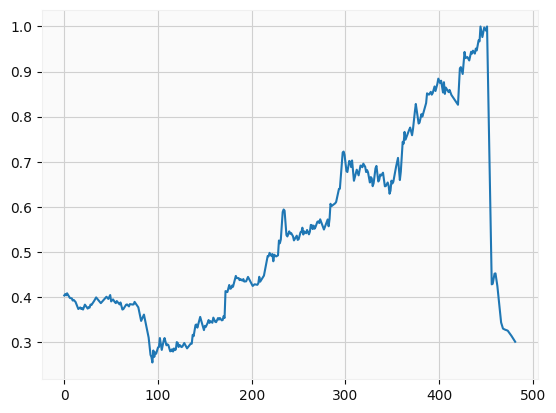

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[6000:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

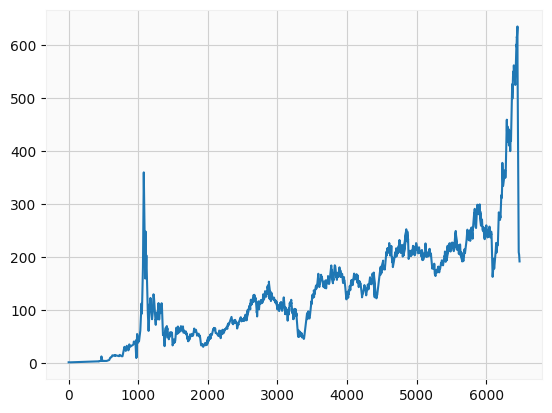

In [ ]:
plt.plot(df3)